Dataset : Iris

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris() #Loading the dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [3]:
iris['data'][:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [4]:
iris['target'][:4]

array([0, 0, 0, 0])

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<h2>Create a pandas data frame from this data</h2>

In [8]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

np.c_ : Stacks 1-D arrays as columns into a 2-D array.

In [9]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<h2>Basic EDA</h2>

In [10]:
iris_eda = iris
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris_eda['species'] = species
iris_eda.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


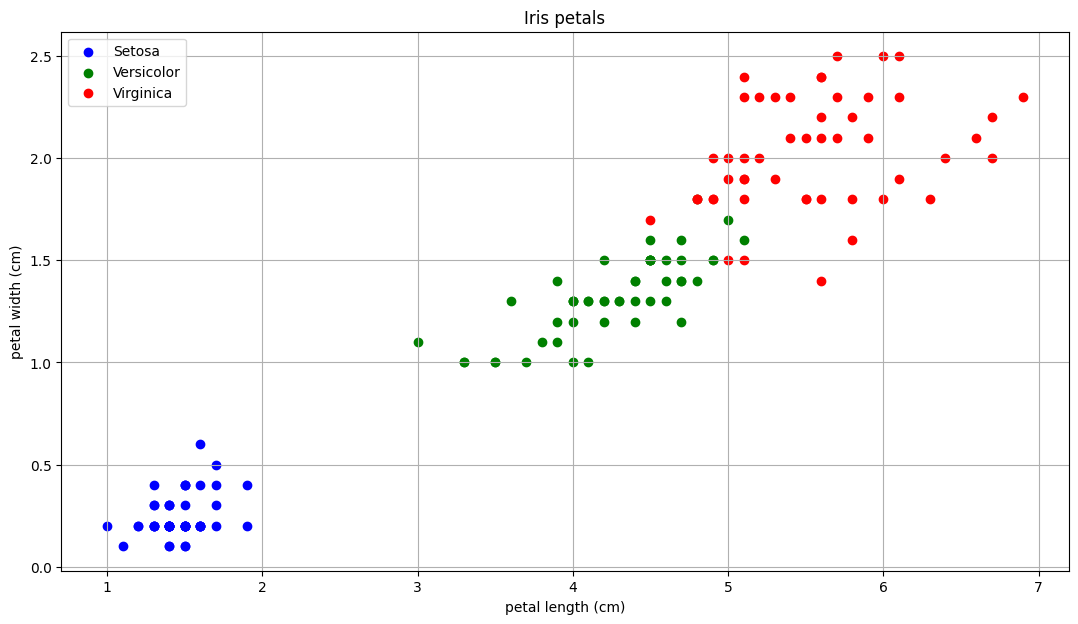

In [11]:
import matplotlib.pyplot as plt

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

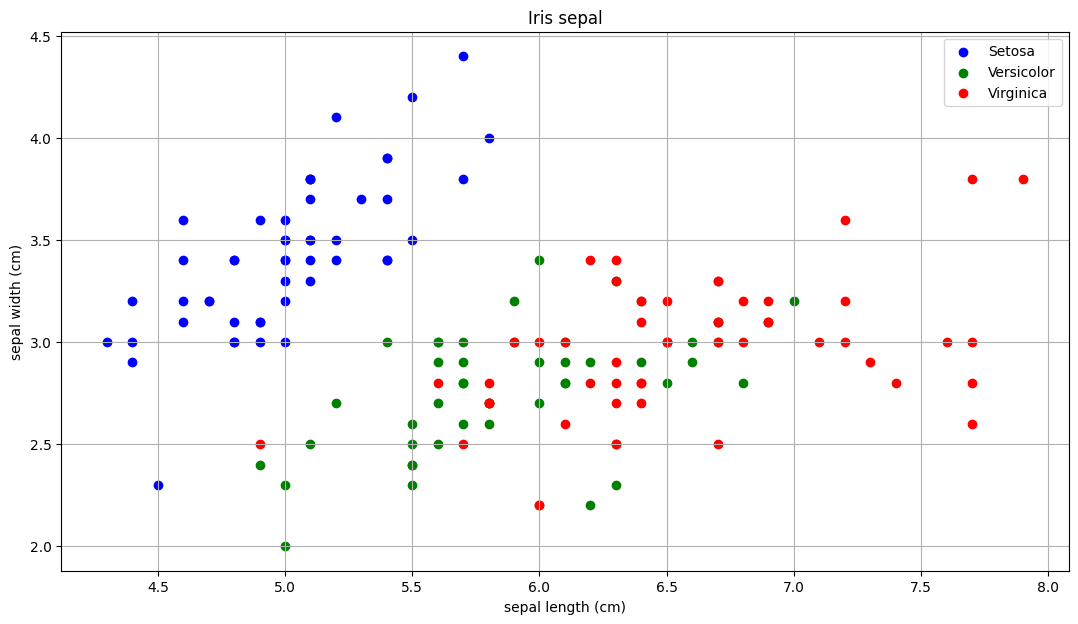

In [12]:
import matplotlib.pyplot as plt

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris sepal")
ax.legend()

<h2>Data Preparation</h2>

In [15]:
x = iris.to_numpy()[:, (2,3)] #Considering only petal length and width
y = iris['target']

x[:5,:]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]], dtype=object)

<h2>Splitting into Training and Test</h2>

In most cases 70:30 split is suggested. Ref: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">Sklearn utility</a>

In [21]:
from sklearn.model_selection import train_test_split

# Splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=30)

len(x_train), len(x_test)

(105, 45)

<h2>Training the model</h2>

Training is made extremely easy with packages like sklearn and keras. The fit method does all the work for us!

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

Note: Multinomial Logistic Regression with softmax function.

<h2>Testing</h2>

In [23]:
predicted = log_reg.predict(x_test)

data= np.c_[predicted, y_test]
data

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [2., 2.],
       [1., 1.],
       [1., 1.],
       [2., 2.],
       [2., 2.],
       [1., 1.],
       [2., 2.],
       [0., 0.],
       [2., 2.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 2.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [2., 2.],
       [2., 2.],
       [2., 1.],
       [2., 2.],
       [0., 0.],
       [1., 1.],
       [2., 2.],
       [1., 1.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [1., 1.],
       [2., 2.],
       [1., 1.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [0., 0.],
       [1., 1.],
       [2., 2.]])

<h2>Performance Metrics</h2>

In [29]:
from sklearn import metrics
# Precision Recall scores
l,levels = pd.factorize(iris['species'])
print(metrics.classification_report(y_test, predicted, digits=2, target_names=levels))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.92      0.92      0.92        13
   virginica       0.95      0.95      0.95        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



<Axes: >

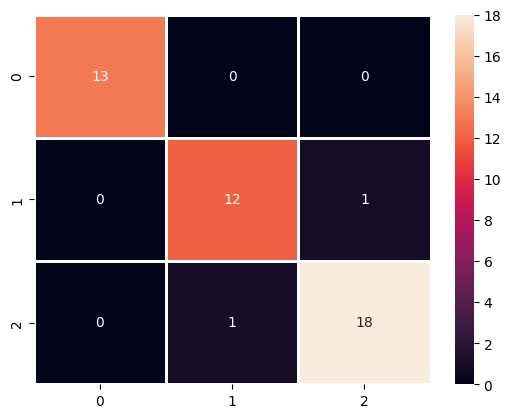

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

<Axes: xlabel='col_0', ylabel='row_0'>

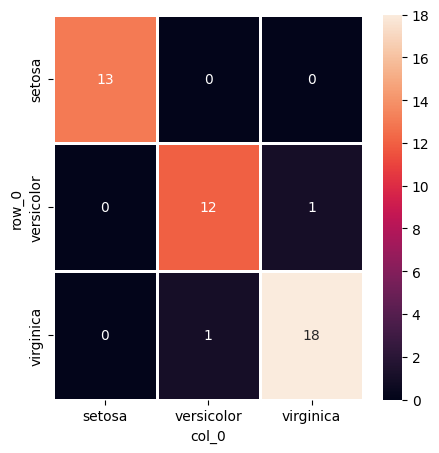

In [39]:
actual_labels = [levels[int(i)] for i in y_test]
predicted_labels = [levels[int(i)] for i in predicted]

cf_matrix = pd.crosstab(actual_labels,predicted_labels)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')